In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sympy import Symbol, diff, exp
from IPython.display import display

In [3]:
def newtons_method(f, fprime, R = 0, max_iter = 1000, tol=1e-3, args = [], debug = False):
    count = 0
    epsilon = 1
    
    while epsilon >= tol:
        count += 1
        if count >= max_iter:
            print('Exiting on runaway loop.')
            return (R, count)
        
        old_R = R
        
        function_value = f(R, args = args)
        function_derivative = fprime(R, args = args)
        
               
        R = -function_value / function_derivative + R
        
        epsilon = np.abs( (R - old_R) / old_R)
        if debug == True:
            print('Iteration = ', count, 'f = ', function_value, 'fprime = ', function_derivative, 'Tol = ', epsilon)
        
    return R, count


def bisection(f, x1, x2, max_iter = 1000, tol = 1e-3, args = []):
    
    epsilon = 1
    count = 0
    
    R = (x1 + x2) / 2
    
    while epsilon >= tol:
        
        count += 1
        
        if count >= max_iter:
            print('Exiting on runaway loop.')
            return (R, count)
        
        old_R = R
        
        f_root = f(R, args)
        if np.sign(f_root) == np.sign( f(x2, args) ):
            x2 = R
        if np.sign(f_root) == np.sign( f(x1, args) ):
            x1 = R

        R = (x1 + x2) / 2
        
        epsilon = np.abs((R - old_R) / old_R)
        
    return R, count

def my_function(x, args = []):
    return 1 / (1 + np.exp(-(x-3))) - 0.2

def my_function_derivative(x, args = []):
    return np.exp(3-x) / np.power((1 + np.exp(-(x-3))), 2)

1.6137056388968707
1.6131591796875
1.612548828125


C:\Users\moone\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


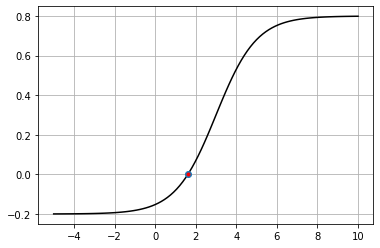

In [4]:
x = np.linspace(-5, 10, 100)
y = my_function(x)

plt.plot(x,y, 'k')
plt.grid(True)

R, count = newtons_method(my_function, my_function_derivative)
print(R)
plt.plot(R, my_function(R), 'o')

R, count = bisection(my_function, -4, 10)
print(R)
plt.plot(R, my_function(R), 'r.')
R, count = bisection(my_function, 10, 0)
print(R)

In [38]:
#x = Symbol('x', real = True)
#y = 1 / (1 + exp(-(x-3))) - 0.2
#display(y)
#d = diff(y, x)
#display(d)

2.0


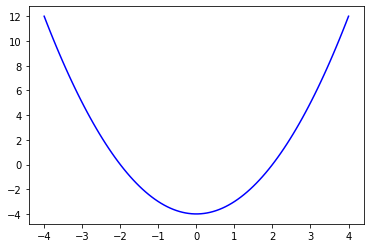

In [8]:
def q(x, args = []):
    return np.power(x, 2) - 4

x = np.linspace(-4, 4, 100)
plt.plot(x, q(x), 'b')
R, count = bisection(q, 1, 3)
print(R)